In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import talib as ta

In [25]:
import tushare as ts

In [26]:
df = ts.get_k_data('sh',start='2020-01-01')
df.index = pd.to_datetime(df.date)
df = df.sort_index()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31181 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-package

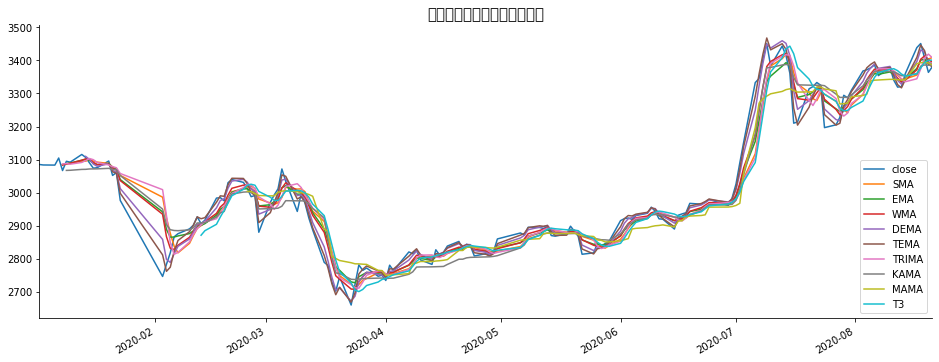

In [27]:
types=['SMA','EMA','WMA','DEMA','TEMA',
'TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)
df_ma.tail()
df_ma.loc['2018-08-01':].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数各种类型移动平均线',fontsize=15)
plt.xlabel('')
plt.show()

d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36208 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21183 missing from current font.
  font.set_text(s, 0, flags=flags)


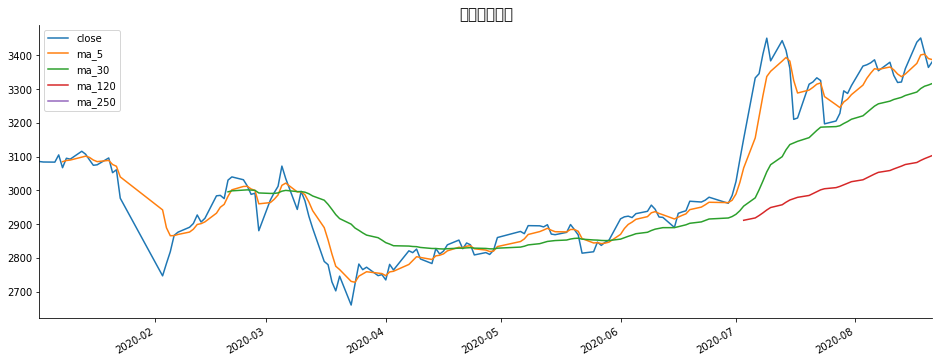

In [28]:
#画5、30、120、250指数移动平均线
N=[5,30,120,250]
for i in N:
    df['ma_'+str(i)]=ta.EMA(df.close,timeperiod=i)
df.tail()

df.loc['2014-01-01':,['close','ma_5','ma_30','ma_120','ma_250']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数走势',fontsize=15)
plt.xlabel('')
plt.show()

d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26519 missing from current font.
  font.set_text(s, 0, flags=flags)


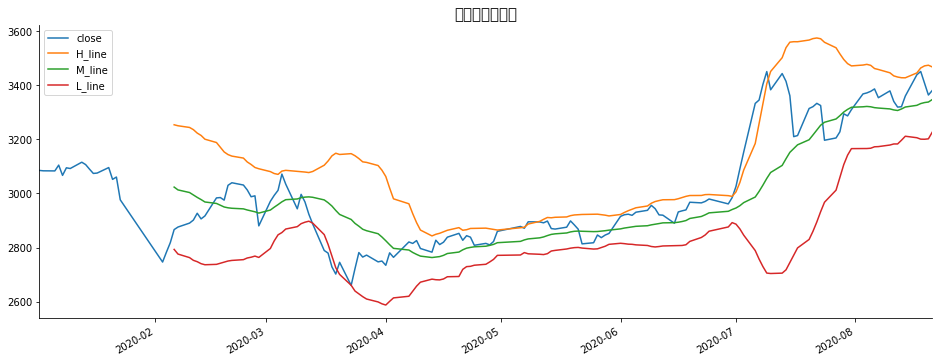

In [32]:
H_line,M_line,L_line=ta.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line
df1.tail()
df1.loc['2020-01-01':'2020-12-30'].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数布林线',fontsize=15)
plt.xlabel('')
plt.show()

In [33]:
df2=pd.DataFrame(df.close)
df2['HT']=ta.HT_TRENDLINE(df.close)
periods =np.array([3]*len(df), dtype=float)
df2['MAVP']=ta. MAVP(df.close,periods)
df2['MIDPOINT']=ta.MIDPOINT(df.close)
df2['MIDPRICE']=ta.MIDPRICE(df.high,df.low)
df2['SAR']=ta.SAR(df.high,df.low)
df2['SAREXT']=ta.SAREXT(df.high,df.low)
df2.tail()

,close,HT,MAVP,MIDPOINT,MIDPRICE,SAR,SAREXT
date,,,,,,,
2020-08-17,3438.80,3319.800588,3373.210000,3362.810,3330.445,3277.849000,3277.849000
2020-08-18,3451.09,3325.955621,3416.663333,3368.955,3359.165,3298.615120,3298.615120
2020-08-19,3408.13,3334.674035,3432.673333,3380.550,3359.165,3320.749803,3320.749803
2020-08-20,3363.90,3343.704482,3407.706667,3385.180,3359.995,3339.785631,3339.785631
2020-08-21,3380.68,3352.791778,3384.236667,3385.180,3359.995,3352.780000,3352.780000


d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\vnstudio\lib\site-packages\

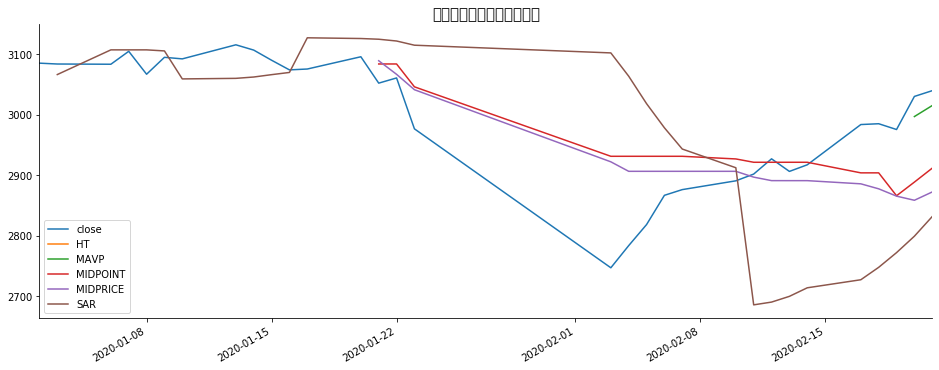

In [35]:
df2.loc['2020-01-01':'2020-02-21',['close','HT','MAVP','MIDPOINT','MIDPRICE','SAR']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的其他趋势指标线',fontsize=15)
plt.xlabel('')
plt.show()

d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25243 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25243 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\vnstudio\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\vnstudio\lib\site-packages\ma

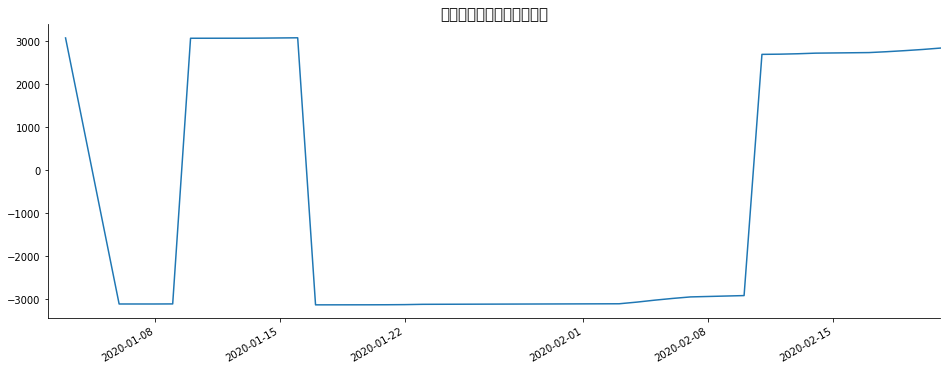

In [37]:
df2.loc['2020-01-01':'2020-02-21','SAREXT'].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的抛物线扩展走势',fontsize=15)
plt.xlabel('')
plt.show()